# **ΣΤΟΙΧΕΙΑ**
ΟΡΕΣΤ ΜΟΥΤΣΑΙ - 1115201900120 - ΠΡΟΠΤΥΧΙΑΚΟΣ

# **Imports**

In [1]:
# Import the Required Libraries And Functions

!pip install contractions
!pip install emoji
!pip install wordcloud
!pip install matplotlib
!pip install wordcloud

import pandas as pd
import numpy as np
import string
import re
import nltk

import emoji
from contractions import fix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import vstack
from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve, PredefinedSplit
from sklearn.datasets import make_classification

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

RANDOMSEED = 21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.1 MB/s eta 0:00:00
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Load the data

train_df = pd.read_csv('/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/train_dataset.csv')
test_df = pd.read_csv('/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/test_dataset.csv')
val_df = pd.read_csv('/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/val_dataset.csv')

# **DATA ANALYSIS**

In [3]:
# Get The Most Common Words And The Number Of Unique And Total Words Before Preprocessing

print("ANALYSING DATA BEFORE PRE-PROCESSING THE DATASET\n")

def get_most_common_words(text_series, top_n=10, exclude_stopwords=True):
    all_words = []
    stop_words = set(stopwords.words('english'))

    for text in text_series.dropna():
        tokens = word_tokenize(text)  # Removed lowercasing
        
        if exclude_stopwords:
            words = [word for word in tokens if word.lower() not in stop_words]
        else:
            words = tokens

        all_words.extend(words)

    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

def count_words(text_series, exclude_stopwords=True, unique=True):
    all_words = []
    stop_words = set(stopwords.words('english'))

    for text in text_series.dropna():
        tokens = word_tokenize(text)
        
        if exclude_stopwords:
            words = [word for word in tokens if word.lower() not in stop_words]
        else:
            words = tokens
        
        all_words.extend(words)

    return len(set(all_words)) if unique else len(all_words)

common_words = get_most_common_words(train_df['Text'], top_n=10, exclude_stopwords=False)
df = pd.DataFrame(common_words, columns=["Word", "Frequency"])

print("For the training dataset:\n", df.to_string(index=False), "\n")

common_words = get_most_common_words(val_df['Text'], top_n=10, exclude_stopwords=False)
df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
print("For the validation dataset:\n", df.to_string(index=False), "\n")

common_words = get_most_common_words(test_df['Text'], top_n=10, exclude_stopwords=False)
df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
print("For the testing dataset:\n", df.to_string(index=False), "\n")

vocab_size = count_words(train_df['Text'], exclude_stopwords=False, unique=True)
print(f"Unique word count in the training dataset: {vocab_size}")

vocab_size = count_words(train_df['Text'], exclude_stopwords=False, unique=False)
print(f"Total word count in the training dataset: {vocab_size}\n")

vocab_size = count_words(val_df['Text'],exclude_stopwords=False, unique=True)
print(f"Unique word count in the validation dataset: {vocab_size}")

vocab_size = count_words(val_df['Text'],exclude_stopwords=False, unique=False)
print(f"Total word count in the validation dataset: {vocab_size}\n")

vocab_size = count_words(test_df['Text'], exclude_stopwords=False, unique=True)
print(f"Unique word count in the testing dataset: {vocab_size}")

vocab_size = count_words(test_df['Text'],exclude_stopwords=False, unique=False)
print(f"Total word count in the testing dataset: {vocab_size}\n")

ANALYSING DATA BEFORE PRE-PROCESSING THE DATASET

For the training dataset:
 Word  Frequency
   !      85636
   .      76885
   @      74891
   I      60523
  to      51924
 the      45883
   ,      45383
   a      34452
   i      27911
 ...      27135 

For the validation dataset:
 Word  Frequency
   !      24852
   .      22536
   @      21508
   I      17400
  to      14630
 the      13073
   ,      12933
   a       9877
   i       8031
 ...       7758 

For the testing dataset:
 Word  Frequency
   !      12425
   .      10983
   @      10703
   I       8501
  to       7493
 the       6665
   ,       6646
   a       5002
 ...       3928
   i       3898 

Unique word count in the training dataset: 167754
Total word count in the training dataset: 2442621

Unique word count in the validation dataset: 66687
Total word count in the validation dataset: 699886

Unique word count in the testing dataset: 40191
Total word count in the testing dataset: 351355



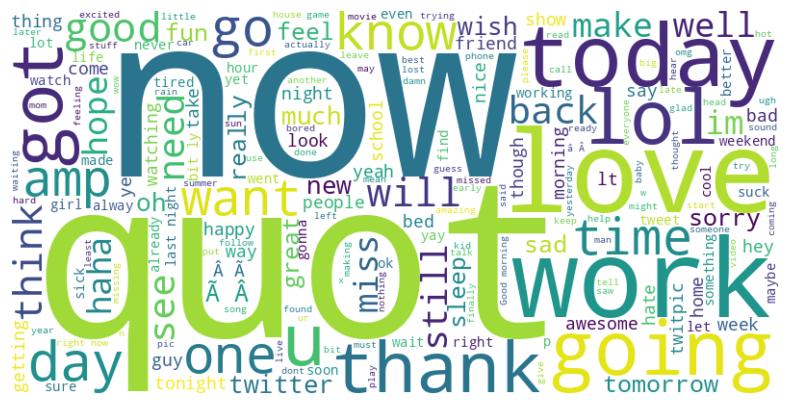

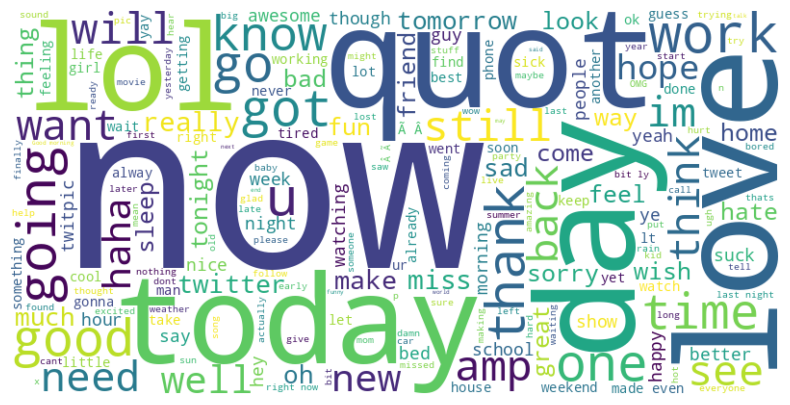

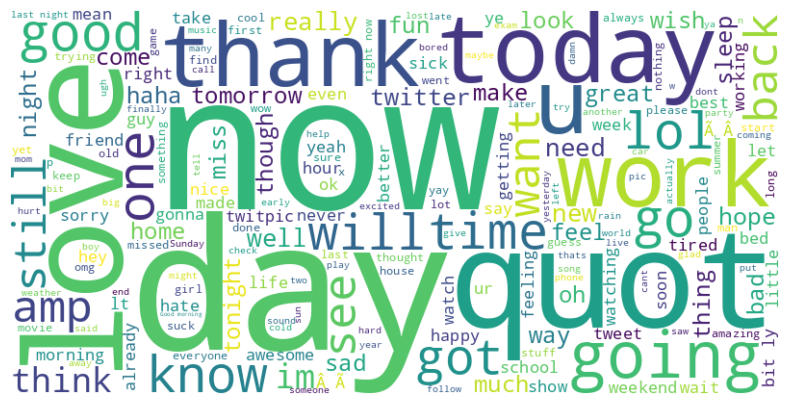

In [4]:
# Generate Word Cloud Before Preprocessing

text = " ".join(str(word) for word in train_df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/kaggle/working/train_word_cloud_before.png')
plt.show()

text = " ".join(str(word) for word in val_df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/kaggle/working/val_word_cloud_before.png')
plt.show()


text = " ".join(str(word) for word in test_df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/kaggle/working/test_word_cloud_before.png')
plt.show()

# **Data Pre-Processing**

In [5]:
# Lowercasing All Text

train_df['Text'] = train_df['Text'].str.lower()
test_df['Text'] = test_df['Text'].str.lower()
val_df['Text'] = val_df['Text'].str.lower()

In [6]:
# Expand abbreviations

abbreviations = {
    "brb": "be right back",
    "tmr": "tomorrow",
    "omg": "oh my god",
    "lol": "laugh out loud",
    "btw": "by the way",
    "idk": "i don't know",
    "imo": "in my opinion",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "afaik": "as far as i know",
    "irl": "in real life",
    "rofl": "rolling on the floor laughing",
    "thx": "thanks",
    "np": "no problem",
    "yw": "you're welcome",
    "idc": "i don't care",
    "ikr": "i know, right",
    "ofc": "of course",
    "pls": "please",
    "sry": "sorry",
    "wbu": "what about you",
    "w/o": "without",
    "w/": "with",
    "rly": "really",
    "u": "you",
    "ur": "your",
    "2": "to",
    "4": "for",
    "b4": "before",
    "gr8": "great",
    "bday": "birthday",
    "bff": "best friends forever",
    "fyi": "for your information",
    "gtg": "got to go",
    "hbu": "how about you",
    "jk": "just kidding",
    "k": "okay",
    "nvm": "never mind",
    "omw": "on my way",
    "ttyl": "talk to you later",
    "ty": "thank you",
    "wtf": "what the fuck",
    "yolo": "you only live once",
    "asap": "as soon as possible",
    "atm": "at the moment",
    "b/c": "because",
    "fyi": "for your information",
    "icymi": "in case you missed it",
    "tmi": "too much information",
    "ftw": "for the win",
    "ily": "i love you",
    "ily2": "i love you too",
    "imho": "in my humble opinion",
    "nbd": "no big deal",
    "tbt": "throwback thursday",
    "tgif": "thank god it's friday",
    "ykyk": "you know you know",
    "rn": "right now",
    "tba": "to be announced",
    "tbd": "to be determined",
    "nsfw": "not safe for work",
    "sfw": "safe for work",
    "eli5": "explain like i'm five",
    "tl;dr": "too long; didn't read",
    "gg": "good game",
    "glhf": "good luck, have fun",
    "afk": "away from keyboard",
    "op": "overpowered",
    "nerf": "weaken a game element",
    "buff": "strengthen a game element",
    "lfg": "looking for group",
    "dps": "damage per second",
    "aoe": "area of effect",
    "eod": "end of day",
    "eom": "end of message",
    "kpi": "key performance indicator",
    "roi": "return on investment",
    "api": "application programming interface",
    "ssh": "secure shell",
    "http": "hypertext transfer protocol",
    "url": "uniform resource locator",
    "os": "operating system",
    "cpu": "central processing unit",
    "gpu": "graphics processing unit",
    "iot": "internet of things",
    "ai": "artificial intelligence",
    "ml": "machine learning",
    "vpn": "virtual private network",
    "html": "hypertext markup language",
    "css": "cascading style sheets",
    "sql": "structured query language",
    "otc": "over the counter",
    "rx": "prescription",
    "er": "emergency room",
    "icu": "intensive care unit",
    "adhd": "attention deficit hyperactivity disorder",
    "apr": "annual percentage rate",
    "ira": "individual retirement account",
    "nyse": "new york stock exchange",
    "sec": "securities and exchange commission",
    "etf": "exchange-traded fund",
    "gdp": "gross domestic product",
    "phd": "doctor of philosophy",
    "ma": "master of arts",
    "ms": "master of science",
    "gpa": "grade point average",
    "sat": "scholastic assessment test",
    "gre": "graduate record examination",
    "ta": "teaching assistant",
    "fwb": "friends with benefits",
    "nsa": "no strings attached",
    "ship": "relationship",
    "dtr": "define the relationship",
    "ghosting": "ending contact abruptly",
    "bnb": "bed and breakfast",
    "visa": "travel permit",
    "tsa": "transportation security administration",
    "gf": "gluten-free",
    "vegan": "no animal products",
    "veg": "vegetarian",
    "byob": "bring your own bottle",
    "mvp": "most valuable player",
    "qb": "quarterback",
    "nfl": "national football league",
    "nba": "national basketball association",
    "bpm": "beats per minute",
    "dj": "disc jockey",
    "mv": "music video",
    "sahm": "stay-at-home mom",
    "blw": "baby-led weaning",
    "pov": "point of view",
    "fomo": "fear of missing out",
    "hmu": "hit me up",
    "lmk": "let me know",
    "fwiw": "for what it's worth",
    "am": "ante meridiem (before noon)",
    "pm": "post meridiem (after noon)",
    "diy": "do it yourself",
    "eta": "estimated time of arrival",
    "rsvp": "répondez s'il vous plaît (please respond)",
    "asl": "age/sex/location",
    "bbl": "be back later",
    "bbl8r": "be back later",
    "bae": "before anyone else",
    "cap": "lying",
    "cmv": "change my view",
    "ctfu": "cracking the fuck up",
    "dafuq": "what the fuck",
    "doxx": "expose personal info",
    "fml": "fuck my life",
    "ft": "featuring",
    "gl": "good luck",
    "hth": "hope this helps",
    "iirc": "if i recall correctly",
    "jsyk": "just so you know",
    "mcm": "man crush monday",
    "mood": "relatable feeling",
    "mrw": "my reaction when",
    "mtfbwy": "may the force be with you",
    "n/a": "not applicable",
    "ootd": "outfit of the day",
    "pov": "point of view",
    "roflmao": "rolling on the floor laughing my ass off",
    "smd": "suck my dick",
    "sus": "suspicious",
    "tbf": "to be fair",
    "tfw": "that feeling when",
    "woke": "socially aware",
    "yeet": "throw forcefully",
    "zerg": "overwhelm with numbers (gaming)",
    "404": "not found",
    "1337": "elite (leet)",
    "143": "i love you",
    "459": "i love you (keypad letters)",
    "irl": "in real life",
    "f2f": "face to face",
    "irl": "in real life",
    "ama": "ask me anything",
    "dm": "direct message",
    "dnd": "do not disturb",
    "fbf": "flashback friday",
    "wcw": "woman crush wednesday",
    "tgm": "thank goodness it's monday",
    "pita": "pain in the ass",
    "pos": "parent over shoulder",
    "qap": "quick as possible",
    "qotd": "quote of the day",
    "roflcopter": "laughing excessively",
    "smdh": "shaking my damn head",
    "srs": "serious",
    "stfu": "shut the fuck up",
    "swak": "sealed with a kiss",
    "tf": "the fuck",
    "thot": "that hoe over there",
    "tia": "thanks in advance",
    "til": "today i learned",
    "tl": "timeline",
    "tmi": "too much information",
    "ttfn": "ta-ta for now",
    "ttul": "talk to you later",
    "tyt": "take your time",
    "wyd": "what you doing",
    "wys": "what you saying",
    "ymmv": "your mileage may vary",
    "yolo": "you only live once",
    "zzz": "sleeping or bored",
}

def replace_abbreviations(text):
    words = text.split()
    expanded_words = [abbreviations.get(word, word) for word in words]
    return ' '.join(expanded_words)

train_df['Text'] = train_df['Text'].apply(replace_abbreviations)
val_df['Text'] = val_df['Text'].apply(replace_abbreviations)
test_df['Text'] = test_df['Text'].apply(replace_abbreviations)

In [7]:
# Expand Contractions

def expand_contractions(text):
    return fix(text)

train_df["Text"] = train_df["Text"].apply(expand_contractions)
val_df["Text"] = val_df["Text"].apply(expand_contractions)
test_df["Text"] = test_df["Text"].apply(expand_contractions)

In [8]:
# Remove URLs, Mentions, Mantaining Only Alphanumeric And Undercores

def clean_text(text):
    text = re.sub(r"http\S+|@\w+", "", text)
    text = re.sub(r"[^a-zA-Z0-9_]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

train_df["Text"] = train_df["Text"].apply(clean_text)
val_df["Text"] = val_df["Text"].apply(clean_text)
test_df["Text"] = test_df["Text"].apply(clean_text)

In [9]:
# Remove All Emojis

def demojize(text):
    return emoji.demojize(text, delimiters=(" ", " "))

train_df["Text"] = train_df["Text"].apply(demojize)
val_df["Text"] = val_df["Text"].apply(demojize)
test_df["Text"] = test_df["Text"].apply(demojize)

In [10]:
# Remove Punctuations

def remove_punctuations(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

train_df["Text"] = train_df["Text"].apply(remove_punctuations)
val_df["Text"] = val_df["Text"].apply(remove_punctuations)
test_df["Text"] = test_df["Text"].apply(remove_punctuations)


In [11]:
# Apply Stemming using Porter

stemmer = PorterStemmer()

def stemming(text):
    tokens = word_tokenize(str(text))
    return " ".join([stemmer.stem(token) for token in tokens])

train_df['Text'] = train_df['Text'].apply(stemming)
val_df['Text'] = val_df['Text'].apply(stemming)
test_df['Text'] = test_df['Text'].apply(stemming)

# **DATA ANALYSIS**

In [12]:
# Get The Most Common Words And The Number Of Unique And Total Words After Preprocessing
print("ANALYSING DATA AFTER PRE-PROCESSING THE DATASET\n")

def get_most_common_words(text_series, top_n=10, exclude_stopwords=True):
    all_words = []
    stop_words = set(stopwords.words('english'))

    for text in text_series.dropna():
        tokens = word_tokenize(text)  # Removed lowercasing
        
        if exclude_stopwords:
            # Case-insensitive stopword check while preserving original case
            words = [word for word in tokens if word.lower() not in stop_words]
        else:
            words = tokens  # Keep all tokens including punctuation

        all_words.extend(words)

    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

def count_words(text_series, exclude_stopwords=True, unique=True):
    all_words = []
    stop_words = set(stopwords.words('english'))

    for text in text_series.dropna():
        tokens = word_tokenize(text)  # Removed lowercasing
        
        if exclude_stopwords:
            words = [word for word in tokens if word.lower() not in stop_words]
        else:
            words = tokens
        
        all_words.extend(words)

    return len(set(all_words)) if unique else len(all_words)


common_words = get_most_common_words(train_df['Text'], top_n=10, exclude_stopwords=False)
df = pd.DataFrame(common_words, columns=["Word", "Frequency"])

print("For the training dataset:\n", df.to_string(index=False), "\n")

common_words = get_most_common_words(val_df['Text'], top_n=10, exclude_stopwords=False)
df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
print("For the validation dataset:\n", df.to_string(index=False), "\n")

common_words = get_most_common_words(test_df['Text'], top_n=10, exclude_stopwords=False)
df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
print("For the testing dataset:\n", df.to_string(index=False), "\n")

vocab_size = count_words(train_df['Text'], exclude_stopwords=False, unique=True)
print(f"Unique word count in the training dataset: {vocab_size}")

vocab_size = count_words(train_df['Text'], exclude_stopwords=False, unique=False)
print(f"Total word count in the training dataset: {vocab_size}\n")

vocab_size = count_words(val_df['Text'],exclude_stopwords=False, unique=True)
print(f"Unique word count in the validation dataset: {vocab_size}")

vocab_size = count_words(val_df['Text'],exclude_stopwords=False, unique=False)
print(f"Total word count in the validation dataset: {vocab_size}\n")

vocab_size = count_words(test_df['Text'], exclude_stopwords=False, unique=True)
print(f"Unique word count in the testing dataset: {vocab_size}")

vocab_size = count_words(test_df['Text'],exclude_stopwords=False, unique=False)
print(f"Total word count in the testing dataset: {vocab_size}\n")

ANALYSING DATA AFTER PRE-PROCESSING THE DATASET

For the training dataset:
 Word  Frequency
   i      95736
  to      60885
 the      49815
  is      36147
   a      35850
 you      33636
  it      32843
 not      32619
  my      30431
 and      28565 

For the validation dataset:
 Word  Frequency
   i      27599
  to      17064
 the      14248
  is      10258
   a      10249
 you       9567
  it       9476
 not       9331
  my       8853
 and       8047 

For the testing dataset:
 Word  Frequency
   i      13464
  to       8718
 the       7205
   a       5216
  is       5176
 you       4832
  it       4761
 not       4640
  my       4457
 and       4149 

Unique word count in the training dataset: 54491
Total word count in the training dataset: 2012754

Unique word count in the validation dataset: 25772
Total word count in the validation dataset: 576031

Unique word count in the testing dataset: 17120
Total word count in the testing dataset: 289224



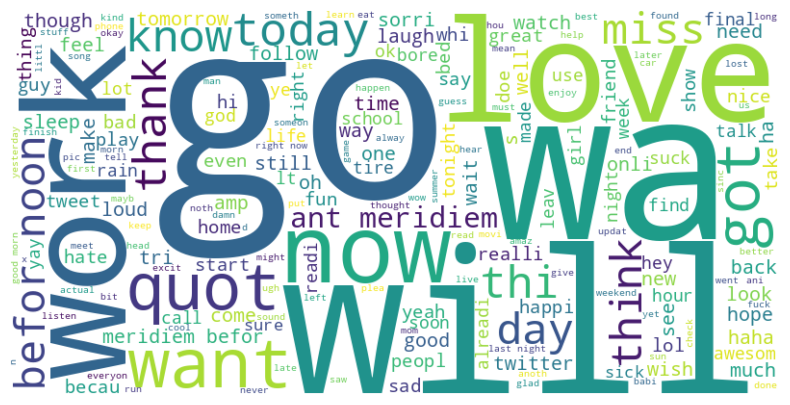

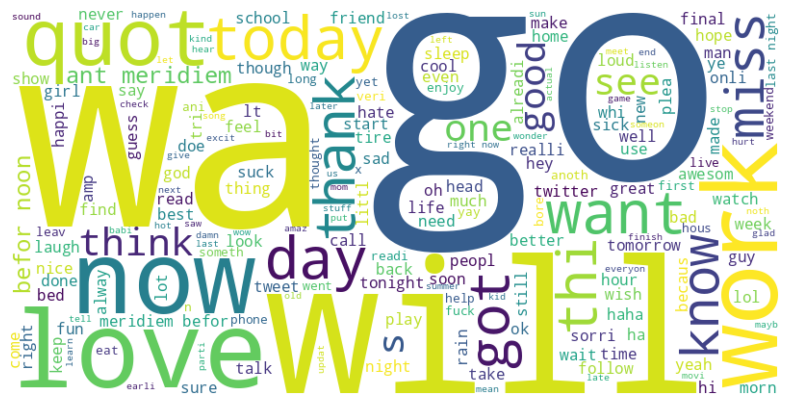

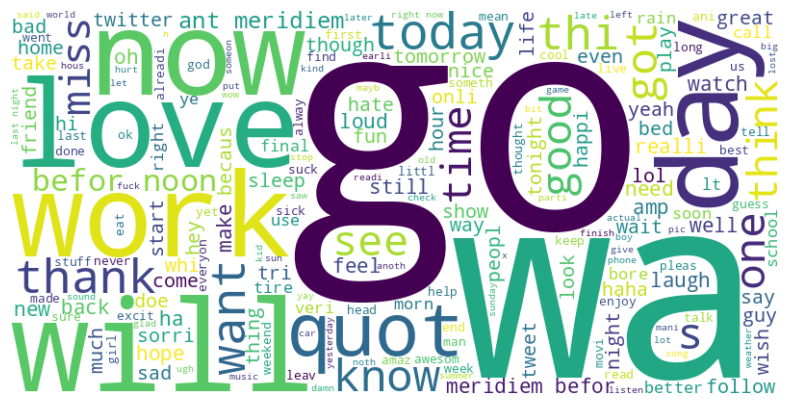

In [13]:
# Generate Word Cloud After Pre-Processing

text = " ".join(str(word) for word in train_df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/kaggle/working/train_word_cloud_after.png')
plt.show()

text = " ".join(str(word) for word in val_df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/kaggle/working/val_word_cloud_after.png')
plt.show()

text = " ".join(str(word) for word in test_df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/kaggle/working/test_word_cloud_after.png')
plt.show()

# **TF-IDF Vectorizer**

In [14]:
# Implement the TF-IDF Vectorizer

vectorizer = TfidfVectorizer(
    max_features=100000, 
    ngram_range=(1,2), 
    min_df=2, 
    max_df=0.95,
    sublinear_tf=True,
    use_idf=True,
    smooth_idf=True,
)

X_train_tfidf = vectorizer.fit_transform(train_df["Text"])

X_val_tfidf = vectorizer.transform(val_df["Text"])
X_test_tfidf = vectorizer.transform(test_df["Text"])

y_train = train_df["Label"]
y_val = val_df["Label"]

# **Logistic Regression**

In [15]:
# Implement the Logistic Regression model

model = LogisticRegression( max_iter=1000, C=0.95,random_state=RANDOMSEED)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_val_tfidf)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy:{accuracy:.5f}")
print("Classification Report:\n", classification_report(y_val, y_pred, digits=5))

Validation Accuracy:0.80640
Classification Report:
               precision    recall  f1-score   support

           0    0.81073   0.79941   0.80503     21197
           1    0.80219   0.81339   0.80775     21199

    accuracy                        0.80640     42396
   macro avg    0.80646   0.80640   0.80639     42396
weighted avg    0.80646   0.80640   0.80639     42396



# **Submit The Model**

In [16]:
# Submit the prediction to Kaggle

test_predictions = model.predict(X_test_tfidf)

submission = pd.DataFrame({"ID": test_df["ID"], "Label": test_predictions})

submission.to_csv("submission.csv", index=False)

# **Analyze The Model**

In [17]:
# Calculate the Absolute Difference (Percentage) Between Training Score and Accuracy Score

y_train_pred = model.predict(X_train_tfidf)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_pred)

absolute_difference = abs((train_accuracy - val_accuracy) * 100)

print(f"Training Accuracy: {train_accuracy:.5f}")
print(f"Validation Accuracy: {val_accuracy:.5f}")
print(f"\nAbsolute Difference (Percentage): {absolute_difference:.5f}%")

Training Accuracy: 0.85294
Validation Accuracy: 0.80640

Absolute Difference (Percentage): 4.65428%


In [18]:
# Calculate the Absolute Difference (Percentage) Between Training Log Loss and Accuracy Log Loss
from sklearn.metrics import log_loss

y_train_proba = model.predict_proba(X_train_tfidf)
y_val_proba = model.predict_proba(X_val_tfidf)

train_log_loss = log_loss(y_train, y_train_proba)
val_log_loss = log_loss(y_val, y_val_proba)

absolute_difference = abs((train_log_loss - val_log_loss) * 100)

print(f"Train Log Loss: {train_log_loss:.4f}")
print(f"Validation Log Loss: {val_log_loss:.4f}")
print(f"\nAbsolute Difference (Percentage): {absolute_difference:.5f}%")

Train Log Loss: 0.3752
Validation Log Loss: 0.4332

Absolute Difference (Percentage): 5.79203%


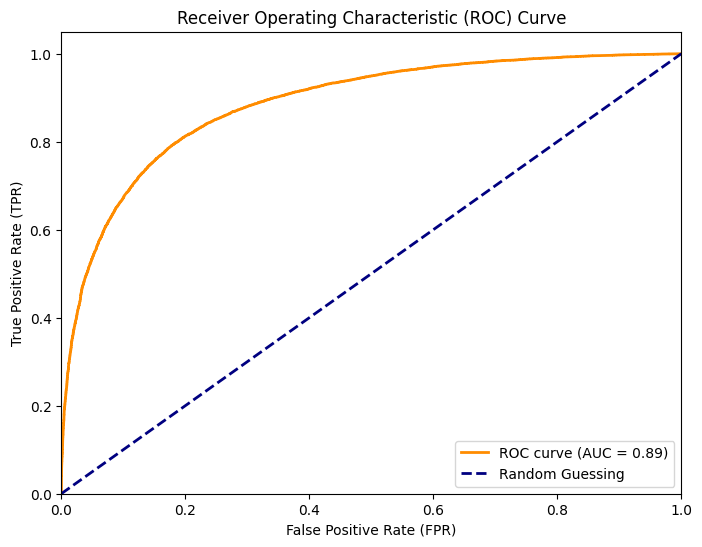

In [19]:
# Generate Receiver operating characteristic (ROC) Curve

y_pred_proba = model.predict_proba(X_val_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('/kaggle/working/roc_curve.png')
plt.show()

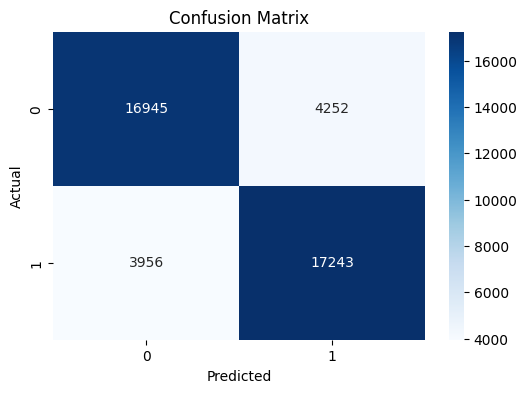

In [20]:
# Generate Confusion Matrix

cm = confusion_matrix(y_val, y_pred)

labels = ["0", "1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('/kaggle/working/confusion_matrix.png')
plt.show()

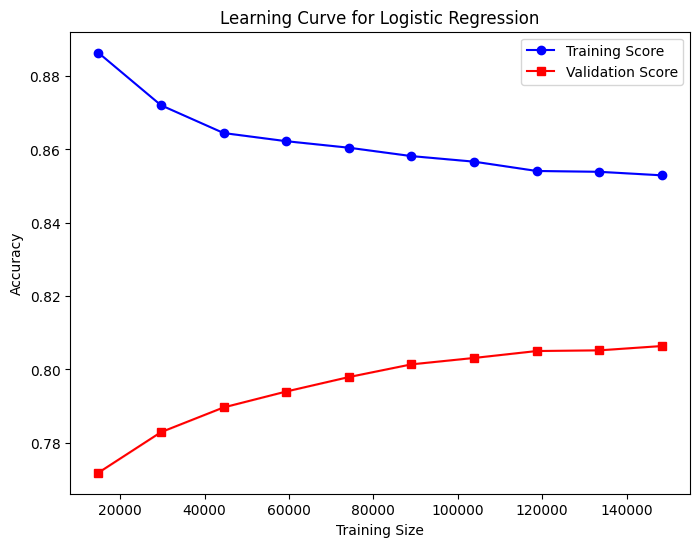

In [21]:
# Generate learning curve

X_combined = vstack([X_train_tfidf, X_val_tfidf])
y_combined = np.concatenate([y_train, y_val])

n_train = X_train_tfidf.shape[0]
n_val = X_val_tfidf.shape[0]

test_fold = np.array([-1] * n_train + [0] * n_val)

custom_cv = PredefinedSplit(test_fold)

test_fold = np.concatenate((-np.ones(len(y_train)), np.zeros(len(y_val))))

ps = PredefinedSplit(test_fold)

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_combined,
    y_combined,
    cv=custom_cv,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.savefig('/kaggle/working/learning_curve.png')
plt.show()